## Scatter Plots and Physics Models

In many labs what I am looking to do is gather data which will be scatter plotted. Then I will seek to model the data numerically which is like plotting a line of best fit but arises from a different thinking process. Does the data look linear or not? Is it rising or falling? How do error bars on my data points affect what is plausible as a physics model.

[matplotlib scatter plot examples](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py)



In [61]:
import numpy as np
np.random.seed(19680801)
import matplotlib as mplt
import matplotlib.pyplot as plt

## My issues at the moment (resolved! - see below)

I don't actually understand this first line. fig feels like a call to something to generate a contain for a figure into which I will add a bunch of stuff. 

I also don't think I understand really what the ```ax = plt.subplots()``` is doing. I have this mental picture that it's setting up an object(?) that is willing to accept a number of subplots. I think at some point I should see what happens if I try to make one of the subplots a line or bar chart and see how it displays them -- so many questions.

### Answer-ish to above

```plt.subplots()``` is a function call that returns two objects -- a figure object and an axis object -- which almost every example in the world calls fig and ax (look back to the Histogram notebook and the tuple which is returned from the ```plt.hist()``` call. Same deal -- got it!

### more general questions/issues

The loop fels like the most understandable part of it in that it generates three scatter plots with the colors chosen from the list element. A quick test shows that 'tab:blue' is just a different color than 'blue'. From the link below this is because 'tab' means tableau color:) I need to get a color list and post it someplace :)

[matplotlib color list](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

Not surprisingly ```ax.grid(True or False)``` turns the grid off and on.

Then I pinched a histogram plot from the other notebook and tried to drop it into the ax container and low and behold it just drops it into the mix -- starting to make sense!! yay!

### Random number generator

[numpy.random.rand()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html) This function returns a value on the interval ```[0,1)``` and the argument (n) tells it how many elements to generate. In the original version of this example the function generated a 2 by n array of points. As long as the two scatter plotted arrays have the same dimensions this works. We will normally plot 1D arrays against each other.

[numpy.random](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) is the parent function and seems VERY handy. It will generate random data drawn from a whole range of distributions. In this case it randomly generates numbers from a random dstribution.

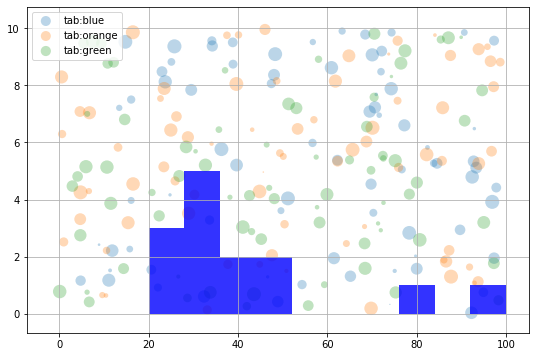

In [2]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 75
    x = 100*np.random.rand(n)  # (2,n)
    y = 10*np.random.rand(n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

x1 = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 10
fullrange = [20,100]
ax.hist(x1, num_bins, fullrange, histtype = "barstacked", color="blue", alpha= .8)

fig.set_size_inches(9, 6)
ax.legend()
ax.grid(True)

plt.show()

# Just so I can understand what it's generating
#print("x:",x)

## Different randomly generated distribution

This is a chance to play with one of the other random distributions. **NOTE** that there are different arguments for each of the different distributions (no surprise).

Also added edge color to the mix. The edgecolors argument is a list of colors that the scatter plot cycles through as it creates the points. To match the edgecolor to the facecolor you need to set edgecolors to a single color for each scatter plot generated in the list of colors. I'm not going to do it now because it's helpful to have the example doing what I would not choose to do.

In [1]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 75
    x = 1*np.random.normal(loc = 10., scale = 2., size = n)  # (2,n)
    y = 10*np.random.rand(n)
    # y = 1*np.random.normal(loc = 10., scale = 2., size = n)
    #scale = 200.0 * np.random.rand(n)
    ax.scatter(x1, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors= ['blue','orange','green'])

fig.set_size_inches(9, 6)
ax.legend()
ax.grid(True)

plt.show()

# Just so I can understand what it's generating
#print("x:",x)

NameError: name 'plt' is not defined

## Better Legends

The next desire is to be able to create a more helpful description of the data **in** the plot. These are called legends.

The first part of this example to pick apart is the ```ax.scatter(x,y,c=c,s=s)``` function call.

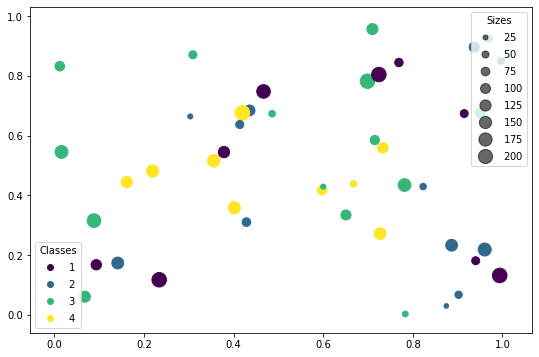

In [4]:
N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
fig.set_size_inches(9, 6)
plt.show()

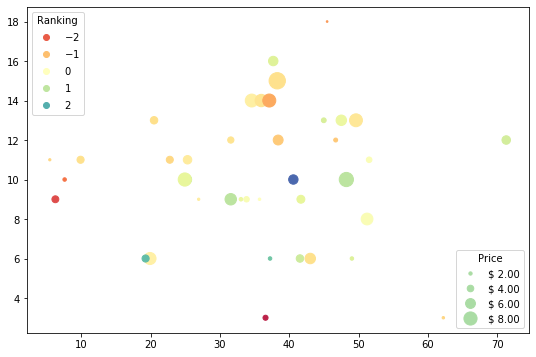

In [5]:
volume = np.random.rayleigh(27, size=40)
amount = np.random.poisson(10, size=40)
ranking = np.random.normal(size=40)
price = np.random.uniform(1, 10, size=40)

fig, ax = plt.subplots()

# Because the price is much too small when being provided as size for ``s``,
# we normalize it to some useful point sizes, s=0.3*(price*3)**2
scatter = ax.scatter(volume, amount, c=ranking, s=0.3*(price*3)**2,
                     vmin=-3, vmax=3, cmap="Spectral")

# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="Ranking")
ax.add_artist(legend1)

# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="$ {x:.2f}",
          func=lambda s: np.sqrt(s/.3)/3)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Price")
fig.set_size_inches(9, 6)
plt.show()

### Scatter Plots for Modeling

All of the above is useful and interesting and I could get lost there for way too long. What I want to be able to do is work on a more applied problem. I have a scatter plot of some data and I want to overlay a particular physics model to see how they match.

Interestingly the first thing I need to do will be to generate some sample data that roughly fits a particular model. This seems like a tool that both Sean R and I will find useful. Here goes...

I generated a smooth linear set of 'data' as a list (x1 and x2 are the early and late data). Then I generated a list of values drawn from a normal distribution (determined by mu and sigma - [np.random.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) ) and I added that scatter to each x value to replicate uneven data generation. Then I concatenated the two lists into a single xdata list [numpy.concatenate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html). Be careful -- there are a number of different ways the concatenate call can work depending on arguments. Rinse and repeat for the ydata.

In [12]:
# number of data points to generate in each part
pts = 5

# normal dist noise to add to data points
mu = 0
sigma =4.

# generate linear set o data points
x1 = np.linspace(0,50,pts)
x2 = np.linspace(50,150,pts)

# generate "noise" around each data point
x1ran = np.random.normal(mu, sigma, pts)
x2ran = np.random.normal(mu, 1.5*sigma, pts)
# print(x1ran)
# print(x2ran)

# add noise to data
xdata1 = x1 + x1ran
xdata2 = x2 + x2ran
# print(xdata1)
# print(xdata2)

# concatenate the two sets of data
xdata = np.concatenate([xdata1,xdata2])
print(xdata)

[ -3.23961446  12.3658087   27.08638038  36.88808393  48.5373278
  43.90496472  75.81073494 105.42389529 123.53497036 158.87537602]


In [35]:
# y data points
# normal dist noise to add to y data points
ymu = 0
ysigma =.5

# pseudo model
slope1 = .12
slope2 = .045
yint1 = 0.
yint2 = 3.

# apply model to x data
y1 = slope1*xdata1 + yint1
y2 = slope2*xdata2 + yint2

# generate "noise" around each data point
y1ran = np.random.normal(ymu, ysigma, pts)
y2ran = np.random.normal(ymu, ysigma, pts)
ydata1 = y1 + y1ran
ydata2 = y2 + y2ran

# concatenate the two sets of data
ydata = np.concatenate([ydata1,ydata2])
print(ydata)

[-0.62146893  1.53513096  3.97591135  4.54284862  6.23415512  5.12951366
  6.1733864   7.9524996   8.90050684 10.29383595]


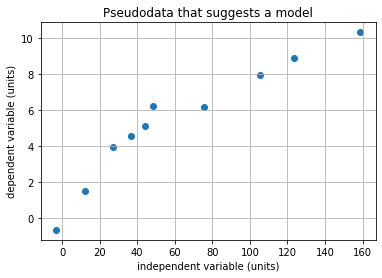

In [46]:

fig9, ax9 = plt.subplots()
ax9.scatter(xdata, ydata)

ax9.set(xlabel='independent variable (units)', ylabel='dependent variable (units)',
       title='Pseudodata that suggests a model')
ax9.grid()

#fig.savefig("mayplot.png")
plt.show()

### Add physics model...

Picking up the ideal model points generated as x1 and y1 and creating the data for the model comes next....

In [50]:
# actual model
model1slope = .12
model2slope = .045
model1int = 0.
model2int = 3.

# range of x values -- choose lower and upper limits of range
model1x = np.linspace(0.,50.,20)
model2x = np.linspace(30.,170.,20)

# y values generated
model1y = model1slope*model1x + model1int
model2y = model2slope*model2x + model2int


### Plotting References

[marker types for scatter plot](https://matplotlib.org/3.1.0/api/markers_api.html#module-matplotlib.markers)

[matplotlib named colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[matplotlib line styles for plot](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)

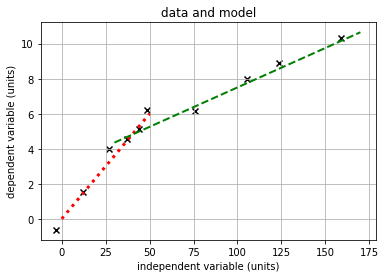

In [71]:
fig10, ax10 = plt.subplots()
ax10.scatter(xdata, ydata, marker = 'x', color = 'black')
ax10.plot(model1x, model1y, color = 'red', linestyle = ':', linewidth = 3.)
ax10.plot(model2x, model2y, color = 'green', linestyle = '--', linewidth = 2.)
ax10.set(xlabel='independent variable (units)', ylabel='dependent variable (units)',
       title='data and model')
ax10.grid()

plt.show()